In [1]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

### Tasks

Training examples size: 60000
Testing examples size: 10000
Unique labels in training set: 10
Image size: (28, 28)


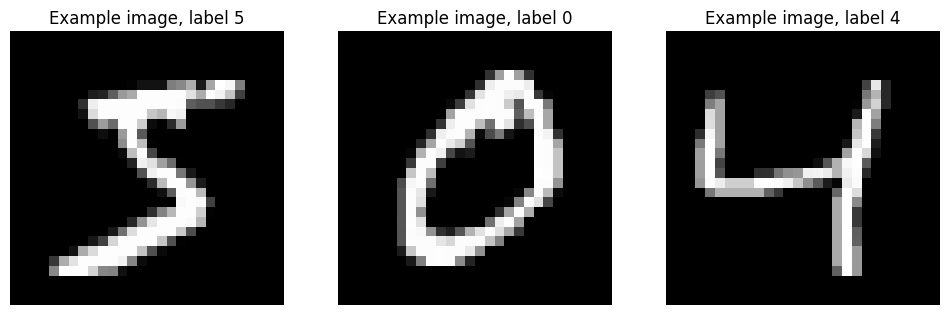

In [2]:
import matplotlib.pyplot as plt

# Task 1
print("Training examples size:", train_images.shape[0])
print("Testing examples size:", test_images.shape[0])

# Task 2
print("Unique labels in training set:", len(set(train_labels)))

# Task 3
print("Image size:", train_images[0].shape)

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 4)

for i in range(3):
    ax[i].imshow(train_images[i], cmap='gray')
    ax[i].set_title(f"Example image, label {train_labels[i]}")
    ax[i].axis('off')

plt.show()

### Network architecture

In [3]:
from keras import models, layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='softmax'))

network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

c:\Users\micha\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Data preparation

In [4]:
from keras.utils import to_categorical

train_images = train_images.reshape((60000, 28*28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28*28)).astype('float32') / 255
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

### Fitting the model

In [5]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9246 - loss: 0.2619
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9677 - loss: 0.1070
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9789 - loss: 0.0714
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9846 - loss: 0.0520
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0391


### Network evaluation

In [6]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
 
print('test_acc:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9812 - loss: 0.0620
test_acc: 0.9811999797821045
